/Users/inagege/Documents/00_Uni/SeminarSocialSentimentInTimesOfCrisis/tools/preprocessing_data.py:19: DtypeWarning: Columns (55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,74,75,148,161,166) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("../Data/data_sample_700_SOSEC_dataset_germany.csv")
[*********************100%***********************]  1 of 1 completed


        F1A13_1   F1A14_1   F3A20_1
0      2.121339 -2.077300  2.085533
1      1.498824 -1.406825 -0.257189
2     -0.368718 -0.065874  0.328491
3     -0.368718 -0.065874 -0.257189
4      0.876310 -0.065874 -0.257189
...         ...       ...       ...
24555  0.253796  0.604602 -0.842869
24556  1.498824 -1.406825  0.328491
24557 -0.368718  0.604602 -0.257189
24558  1.498824 -1.406825  0.914172
24559  0.876310 -1.406825  2.085533

[24560 rows x 3 columns]


<Axes: >

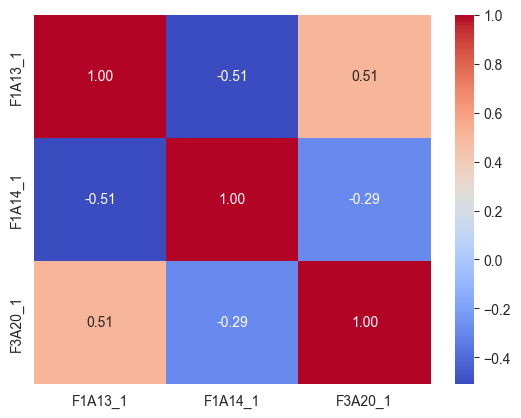

In [1]:
from tools.add_external_data import add_external_data
from tools.preprocessing_data import load_data, encode_data_to_numeric, min_max_scale_data, fill_nan_individually, get_data_since_date
import seaborn as sns

indizes = ['inflation_rate', 'interest_rate', 'dax_points', 'MSCI_world']
stocks = ['F3A21_1', 'F5A10_2']
informative = ['F5aA1_1', 'F5aA2_1', 'F5aA3_1', 'F5bA1_1','F5bA2_1' ,'F5bA3_1' ,'F5bA4_1' ,'F5bA5_1', 'F5A10_1', 'F5A11_1', 'F5A12_1', 'F5A13_1', 'F5A14_1']
#academic = ['F7g', 'F7h', 'F7i']
corona = ['F3A16_1', 'F3A17_1']
ukraine = ['F2A6', 'F2A14']
energy_crisis = ['F1A13_1', 'F1A14_1']

data = load_data()
data = add_external_data(data)

data = get_data_since_date(data, '2023-04-01')

data = encode_data_to_numeric(data)

data = data[energy_crisis]

data = fill_nan_individually(data)
data = min_max_scale_data(data)

print(data)

correlation_matrix = data.cov()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [19]:
alle = indizes + stocks + informative + corona + ukraine + energy_crisis

data = load_data()
data = add_external_data(data)
data = encode_data_to_numeric(data)

data = data[alle]

data = min_max_scale_data(data)
data = fill_nan_individually(data)

correlation_matrix = data.corr()

# Get pairs of features with correlation greater than 0.5
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs['Correlation']) > 0.5]

# Remove self-correlations and duplicate pairs
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] != high_corr_pairs['Feature2']]
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlation'])

# Print the result
print(high_corr_pairs)
print(all)

/Users/inagege/Documents/00_Uni/SeminarSocialSentimentInTimesOfCrisis/tools/preprocessing_data.py:20: DtypeWarning: Columns (55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,74,75,148,161,166) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("../Data/data_sample_700_SOSEC_dataset_germany.csv")
[*********************100%***********************]  1 of 1 completed


                 Feature1        Feature2  Correlation
1    consumer_price_index  inflation_rate     1.000000
2    consumer_price_index   interest_rate    -0.888746
3    consumer_price_index      dax_points    -0.832832
61          interest_rate      dax_points     0.725135
121               F3A21_1         F5A10_2     0.567009
188               F5aA1_1         F5bA4_1     0.636327
244               F5aA3_1         F5bA2_1     0.571791
271               F5aA4_1         F5aA5_1     0.622026
361               F5bA2_1         F5bA3_1     0.607627
481               F5A10_1         F5A11_1     0.779167
483               F5A10_1         F5A13_1     0.686500
512               F5A11_1         F5A13_1     0.648233
661               F3A16_1         F3A17_1     0.515489
811               F1A13_1         F1A14_1    -0.525179
['consumer_price_index', 'inflation_rate', 'interest_rate', 'dax_points', 'F3A21_1', 'F5A10_2', 'F5aA1_1', 'F5aA2_1', 'F5aA3_1', 'F5aA4_1', 'F5aA5_1', 'F5bA1_1', 'F5bA2_1', 'F

/Users/inagege/Documents/00_Uni/SeminarSocialSentimentInTimesOfCrisis/tools/preprocessing_data.py:19: DtypeWarning: Columns (55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,74,75,148,161,166) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("../Data/data_sample_700_SOSEC_dataset_germany.csv")
[*********************100%***********************]  1 of 1 completed


Unnamed: 0
i_NUMBER
i_START
i_END
i_TIME
unique_id
wave_first
F1A1_1
F1A2_1
F1A3_1
F1A4_1
F1A5_1
F1A6_1
F1A7_1
F1A8_1
F1A9_1
F1A10_1
F1A11_1
F1A12_1
F1A13_1
F1A14_1
F1A15_1
F1A16_1
F1A17_1
F1A19_1
F2A1
F2A2
F2A3
F2A4
F2A5
F2A6
F2A7
F2A8
F2A9
F2A10
F2A11
F2A12
F3A1_1
F3A2_1
F3A3_1
F3A4_1
F3A5_1
F3A6_1
F3A7_1
F3A8_1
F3A9_1
F3A10_1
F3A11_1
F3A12_1
F3A13_1
F3A14_1
F3A15_1
F3A16_1
F3A17_1
F3A18_1
F4aA1
F4aA2
F4bA1
F4bA2
F4bA3
F4bA4
F4bA5
F4bA6
F4bA7
F4bA8
F4bA9
F4bA10
F4bA11
F4bA12
F4bA13
F4bA14
F4bA15
F4bA16
F4i_neuA1
F4i_neuA2
F4i_neuA3
F5A1_1
F5A2_1
F5A3_1
F5A4_1
F5A5_1
F5A6_1
F5A7_1
F5A8_1
F5A9_1
F5A10_1
F5A11_1
F5A12_1
F5A13_1
F5A14_1
F5aA1_1
F5aA2_1
F5aA3_1
F5bA1_1
F5bA2_1
F5bA3_1
F5bA4_1
F5bA5_1
F5bA6_1
F6a_cduA1
F6a_cduA2
F6a_spdA1
F6a_spdA2
F6a_fdpA1
F6a_fdpA2
F6a_gruenenA1
F6a_gruenenA2
F6a_linkeA1
F6a_linkeA2
F6a_afdA1
F6a_afdA2
F6b_cduA1
F6b_cduA2
F6b_spdA1
F6b_spdA2
F6b_fdpA1
F6b_fdpA2
F6b_gruenenA1
F6b_gruenenA2
F6b_linkeA1
F6b_linkeA2
F6b_afdA1
F6b_afdA2
F6mA1_1
F7a
F7bA1
F7c

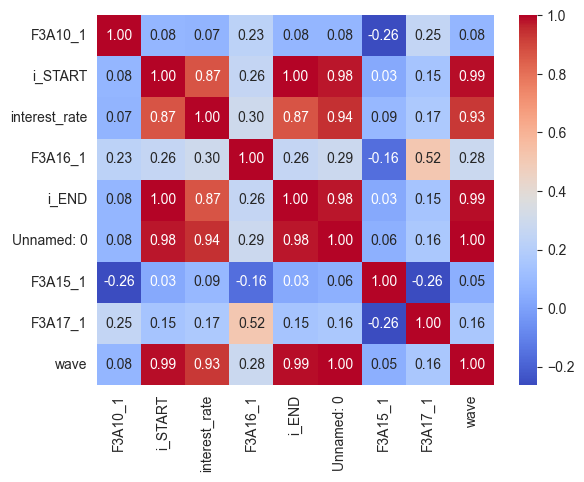

In [6]:
import matplotlib.pyplot as plt
from tools.add_external_data import add_external_data
from tools.preprocessing_data import load_data, encode_data_to_numeric, min_max_scale_data, fill_nan_individually, get_data_since_date
import seaborn as sns

# Load and preprocess the data
data = load_data()
data = add_external_data(data)
data = encode_data_to_numeric(data)
data = fill_nan_individually(data)
data = min_max_scale_data(data)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get features that correlate with F3A16_1 or F3A17_1 more than 0.5
relevant_features = correlation_matrix.index[
    (correlation_matrix['F3A16_1'].abs() > 0.25) | (correlation_matrix['F3A17_1'].abs() > 0.25)
].tolist()

# Include F3A16_1 and F3A17_1 in the relevant features
relevant_features = list(set(relevant_features + ['F3A16_1', 'F3A17_1']))

# Create a new correlation matrix with the relevant features
filtered_correlation_matrix = data[relevant_features].corr()

# Plot the heatmap
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()